# Classification using Artificial Neural Networks

Based on tutorial at https://towardsdatascience.com/building-your-own-artificial-neural-network-from-scratch-on-churn-modeling-dataset-using-keras-in-690782f7d051

In this dataset we would be doing Churn Modeling (writing a Artificial Neural Network to model which customers left the bank). This is a classification problem (1 if the customer left, 0 if the customer stayed).

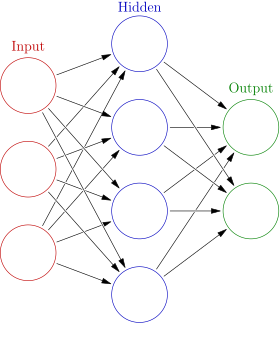

We could use Theano or Tensorflow, but these libraries require us to write most of the ML code from
scratch. Instead, we make use of Keras, which enables us to write powerful Neural Networks with a few lines of code. Keras runs on Theano and Tensorflow. You can think it of as a sklearn for Deep Learning.

## Task: Understanding Key Concepts

First, we need to better understand neural networks. Watch the following video and then answer the questions that follow. Some of the answers will come from the video and some will require some searching:

https://www.youtube.com/watch?v=oV3ZY6tJiA0&vl=en&ab_channel=CrashCourse

### Define the following terms in a sentence or two each:
- Neural network
- Neurons
- Hidden layer
- Bias
- Activation function
- Forward-propagation
- Gradient descent
- Back-propagation
- Epoch

Neural network - 
Neurons - 
Hidden layer - 
Bias - 
Activation function - 
Forward-propagation - 
Gradient descent - 
Back-propagation - 
Epoch - 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Creating feature and target vectors

Looking at the features we can see that RowNumber, CustomerId, and Surname will have no relation with a customer leaving the bank. We drop them from X, which now contains the features indices from 3 to 12.

In [5]:
X = dataset.iloc[:, 3:13].values

We store the dependent value/predicted value in y by storing the 13th index in the variable y.

In [6]:
y = dataset.iloc[:, 13].values

#Printing out the values of X --> Which contains the features
#                           y --> Which contains the target variable
print(pd.DataFrame(X[:10]))
print()
print(pd.DataFrame(y[:10]))

     0        1       2   3  4          5  6  7  8          9
0  619   France  Female  42  2        0.0  1  1  1  101348.88
1  608    Spain  Female  41  1   83807.86  1  0  1  112542.58
2  502   France  Female  42  8   159660.8  3  1  0  113931.57
3  699   France  Female  39  1        0.0  2  0  0   93826.63
4  850    Spain  Female  43  2  125510.82  1  1  1    79084.1
5  645    Spain    Male  44  8  113755.78  2  1  0  149756.71
6  822   France    Male  50  7        0.0  2  1  1    10062.8
7  376  Germany  Female  29  4  115046.74  4  1  0  119346.88
8  501   France    Male  44  4  142051.07  2  0  1    74940.5
9  684   France    Male  27  2  134603.88  1  1  1   71725.73

   0
0  1
1  0
2  1
3  0
4  0
5  1
6  0
7  1
8  0
9  0


### Encoding categorical data

Neural networks can only handle numerical data. The categorical data in Geography and Gender won't work. You might recall there was a concept called get_dummies in pandas that would convert categorical variables to several binary columns instead. That's what we'll do here, but with something called LabelEncoder.

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [8]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
print(pd.DataFrame(X[:10]))

     0        1       2   3  4          5  6  7  8          9
0  619   France  Female  42  2        0.0  1  1  1  101348.88
1  608    Spain  Female  41  1   83807.86  1  0  1  112542.58
2  502   France  Female  42  8   159660.8  3  1  0  113931.57
3  699   France  Female  39  1        0.0  2  0  0   93826.63
4  850    Spain  Female  43  2  125510.82  1  1  1    79084.1
5  645    Spain    Male  44  8  113755.78  2  1  0  149756.71
6  822   France    Male  50  7        0.0  2  1  1    10062.8
7  376  Germany  Female  29  4  115046.74  4  1  0  119346.88
8  501   France    Male  44  4  142051.07  2  0  1    74940.5
9  684   France    Male  27  2  134603.88  1  1  1   71725.73


Creating label encoder object no. 1 to encode Geography name (index 1 in features) for France, Spain, Germany.

Next, encoding Geography from string to just 3 numbers (0 = France, 1 = Spain, 2 = Germany).

In [10]:
ct = ColumnTransformer([("Geography", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)
print(pd.DataFrame(X[:10]))

    0    1    2    3       4   5  6          7  8  9  10         11
0  1.0  0.0  0.0  619  Female  42  2        0.0  1  1  1  101348.88
1  0.0  0.0  1.0  608  Female  41  1   83807.86  1  0  1  112542.58
2  1.0  0.0  0.0  502  Female  42  8   159660.8  3  1  0  113931.57
3  1.0  0.0  0.0  699  Female  39  1        0.0  2  0  0   93826.63
4  0.0  0.0  1.0  850  Female  43  2  125510.82  1  1  1    79084.1
5  0.0  0.0  1.0  645    Male  44  8  113755.78  2  1  0  149756.71
6  1.0  0.0  0.0  822    Male  50  7        0.0  2  1  1    10062.8
7  0.0  1.0  0.0  376  Female  29  4  115046.74  4  1  0  119346.88
8  1.0  0.0  0.0  501    Male  44  4  142051.07  2  0  1    74940.5
9  1.0  0.0  0.0  684    Male  27  2  134603.88  1  1  1   71725.73


Creating label encoder object no. 1 to encode Gender name (now index 4 in features) for Male, Female.

Next, encoding Gender from string to 2 numbers (0 for Male and 1 for Female).

In [11]:
ct = ColumnTransformer([("Gender", OneHotEncoder(), [4])], remainder = 'passthrough')
X = ct.fit_transform(X)
print(pd.DataFrame(X[:10]))

    0    1    2    3    4    5   6  7          8  9  10 11         12
0  1.0  0.0  1.0  0.0  0.0  619  42  2        0.0  1  1  1  101348.88
1  1.0  0.0  0.0  0.0  1.0  608  41  1   83807.86  1  0  1  112542.58
2  1.0  0.0  1.0  0.0  0.0  502  42  8   159660.8  3  1  0  113931.57
3  1.0  0.0  1.0  0.0  0.0  699  39  1        0.0  2  0  0   93826.63
4  1.0  0.0  0.0  0.0  1.0  850  43  2  125510.82  1  1  1    79084.1
5  0.0  1.0  0.0  0.0  1.0  645  44  8  113755.78  2  1  0  149756.71
6  0.0  1.0  1.0  0.0  0.0  822  50  7        0.0  2  1  1    10062.8
7  1.0  0.0  0.0  1.0  0.0  376  29  4  115046.74  4  1  0  119346.88
8  0.0  1.0  1.0  0.0  0.0  501  44  4  142051.07  2  0  1    74940.5
9  0.0  1.0  1.0  0.0  0.0  684  27  2  134603.88  1  1  1   71725.73


We remove the first column because two columns is enough to encode three countries. In other words, if those two columns are both 0, it must be the third country.

In [12]:
X = X[:,1:]
print(pd.DataFrame(X[:10]))

    0    1    2    3    4   5  6          7  8  9  10         11
0  0.0  1.0  0.0  0.0  619  42  2        0.0  1  1  1  101348.88
1  0.0  0.0  0.0  1.0  608  41  1   83807.86  1  0  1  112542.58
2  0.0  1.0  0.0  0.0  502  42  8   159660.8  3  1  0  113931.57
3  0.0  1.0  0.0  0.0  699  39  1        0.0  2  0  0   93826.63
4  0.0  0.0  0.0  1.0  850  43  2  125510.82  1  1  1    79084.1
5  1.0  0.0  0.0  1.0  645  44  8  113755.78  2  1  0  149756.71
6  1.0  1.0  0.0  0.0  822  50  7        0.0  2  1  1    10062.8
7  0.0  0.0  1.0  0.0  376  29  4  115046.74  4  1  0  119346.88
8  1.0  1.0  0.0  0.0  501  44  4  142051.07  2  0  1    74940.5
9  1.0  1.0  0.0  0.0  684  27  2  134603.88  1  1  1   71725.73


Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

We now scale the columns to reduce computational complexity and to avoid one variable dominating the calculations.

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Now let's make the ANN!

Let's list out the steps involved in training the ANN with Stochastic Gradient Descent.

1) Randomly initialize the weights to small numbers close to but not 0.

2) Input the 1st observation of your dataset in the input layer, with each feature in one input node.

3) Forward-Propagation from left to right. The neurons are activated in a way that the impact of each neuron's activation is limited by the weights. Propagate the activations until getting the predicted result y.

4) Compare the predicted result with the actual result. Measure the generated error.

5) Back-Propagation: From right to left, error is back propagated. Update the weights according to how much they are responsible for the error. The learning rate tells us by how much we should update the weights.

6) Repeat steps 1 to 5 and update the weights after each observation (reinforcement learning). Or: Repeat Steps 1 to 5, but update the weights only after a batch of observations (batch learning)

7) When the whole training set is passed through the ANN, that completes an epoch. Redo more epochs.

### Let's take a step back

Here is a tutorial that explains much of the terminology above in more detail than the YouTube video you watched earlier. This involves some nasty calculus (partial derivatives and optimizations), but I think you can grasp most of the conceptual pieces.

https://medium.com/yottabytes/everything-you-need-to-know-about-gradient-descent-applied-to-neural-networks-d70f85e0cc14

Some good definitions here as well (entire series linked in article): 

https://www.learnopencv.com/neural-networks-a-30000-feet-view-for-beginners/

In [15]:
# Importing the Keras libraries and packages

###############
# If you get an error about loading a DLL file, try this in Anaconda Powershell 
# then restart Jupyter notebook completely:
# pip install tensorflow==2.0.0 --user
###############
# !pip install tensorflow --user
from tensorflow.keras.models import Sequential # For building the Neural Network layer by layer
from tensorflow.keras.layers import Dense # To randomly initialize the weights to small numbers close to 0(But not 0)

### Initializing the ANN

We will not put any parameter in the sequential object since we will be defining the layers manually.

In [16]:
classifier = Sequential()

### Adding the input layer and the first hidden layer

How many nodes of the hidden layer do we actually need?
There is no rule of thumb, but you can set the number of nodes in hidden layers as an average of the number of nodes in input and output layers, respectively.
Here avg= (11+1)/2==>6 So set output dim=6

The activation Function is Rectifier Activation Function.

The kernel initializer will initialize the hidden layer weights uniformly.

Input dim tells us the number of nodes in the input layer. This is done only once and won't be specified in further layers.

In [17]:
classifier.add(Dense(activation="relu", input_dim=12, units=6, kernel_initializer="uniform"))

### Adding the second hidden layer

In [18]:
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

### Adding the output layer

The sigmoid activation function is used whenever we need the probabilities of 2 categories (similar to logistic regression). We switch to Softmax activation functions when the dependent variable has more than 2 categories.

In [19]:
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

### Compiling the ANN

The Adam optimizer is a form of stochastic gradient descent. Luckily for you, this does all of the math behind the scenes.

In [20]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Fitting the ANN to the Training set. 

This step will take some time for large epoch values. A batch size of 10 means that the weights will update after every 10 observations. Epoch is a round of whole data flow through the network. 

Watch the accuracy change as the epochs progress.

In [21]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 2s 1ms/step - loss: 0.5097 - accuracy: 0.7955
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4332 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4296 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4275 - accuracy: 0.7960
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4256 - accuracy: 0.7960
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4234 - accuracy: 0.8052
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4210 - accuracy: 0.8220
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4185 - accuracy: 0.8238
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4167 - accuracy: 0.8260
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4147 - accura

800/800 [==============================] - 1s 2ms/step - loss: 0.3919 - accuracy: 0.8370
Epoch 82/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3927 - accuracy: 0.8350
Epoch 83/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3926 - accuracy: 0.8367
Epoch 84/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3925 - accuracy: 0.8371
Epoch 85/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3924 - accuracy: 0.8372
Epoch 86/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3926 - accuracy: 0.8356
Epoch 87/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3924 - accuracy: 0.8360
Epoch 88/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3924 - accuracy: 0.8364
Epoch 89/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3927 - accuracy: 0.8359
Epoch 90/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3922 - accuracy: 

## Part 3 - Making the predictions and evaluating the model

Predicting the Test set results

In [22]:
y_pred = classifier.predict(X_test)

63/63 [==============================] - 0s 1ms/step


If y_pred is larger than 0.5, it returns true (1). Otherwise false (2). This determines what the neural network "voted" regarding this customer.

In [23]:
y_pred = (y_pred > 0.5)

Making the Confusion Matrix. Finally, something familiar :)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
accuracy = (tn + tp) / (tn + tp + fn + fp)
print(accuracy)

[[1525   70]
 [ 248  157]]
0.841


## Task: Play around with the batch size and epoch hyperparameters and paste the final results here for each run. Compare the accuracies.

In [25]:
classifier.fit(X_train, y_train, batch_size = 1000000, epochs = 1)
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
accuracy = (tn + tp) / (tn + tp + fn + fp)
print(accuracy)

63/63 [==============================] - 0s 1ms/step
[[1526   69]
 [ 249  156]]
0.841


In [26]:
classifier.fit(X_train, y_train, batch_size = 100, epochs = 20)
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
accuracy = (tn + tp) / (tn + tp + fn + fp)
print(accuracy)

Epoch 1/20
80/80 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8354
Epoch 2/20
80/80 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8365
Epoch 3/20
80/80 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8370
Epoch 4/20
80/80 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8378
Epoch 5/20
80/80 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8367
Epoch 6/20
80/80 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8378
Epoch 7/20
80/80 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8374
Epoch 8/20
80/80 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8371
Epoch 9/20
80/80 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8381
Epoch 10/20
80/80 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8370
Epoch 11/20
80/80 [

## Part 4 - Predicting whether a new customer will stay at the bank

Input: Two binary columns for geography, two binary columns for gender, credit score, age, tenure, balance, num products, has credit card, is active member, estimated salary 

Based on idea at https://towardsdatascience.com/ann-classification-banking-customer-leave-or-stay-1cba16441185. This link has a bug in the code in the sc.transform line. They transform it twice. Fixed here.

In [27]:
#0 0 1 0 619 42 2 0 1 1 1 56700
new_customer = [[0, 0, 1, 0, 619, 42, 2, 5000, 1, 1, 0, 50700]]
new_customer = sc.transform(new_customer)
new_prediction = classifier.predict(new_customer)
print(new_prediction)

1/1 [==============================] - 0s 23ms/step
[[0.56363285]]


## Task: NBA Data Scientist 

You're a data scientist for the New York Knicks. Your team has several rookies and the team is trying to assess whether to pursue longer term contracts for each or whether to let that player go. 

The general manager (GM) comes to you to see if you have any advice. You panic, mumble something about machine learning, and start googling when you get back to your desk. Thankfully, you find a dataset that contains various player metrics during a player's rookie season, along with a binary classification indicating whether they were still playing in the league five years later (dataset to be provided). The column meanings are as follows: 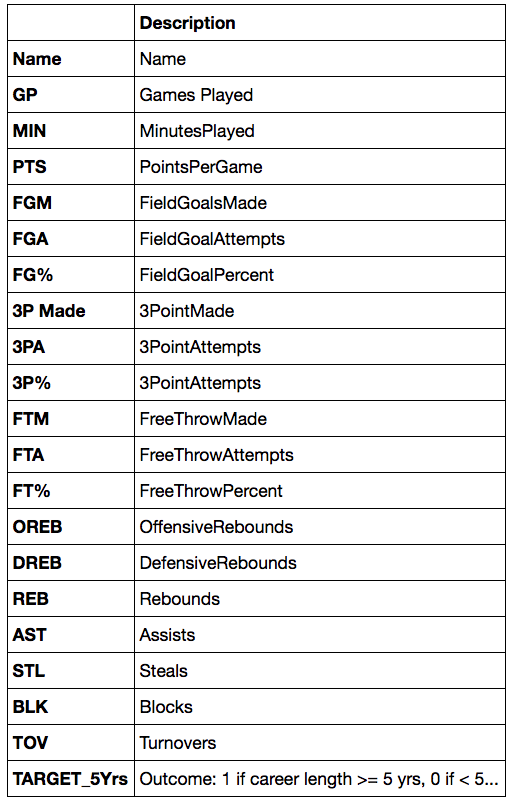.

Implement a supervised ANN to make the prediction for a given player given his rookie year statistics. Demonstrate how it works by showing the predictions for a few players similar to what we did in part 4 above. 

Explain the model approach, results, and recommendations in terms that the GM would understand given that he or she is intelligent but not a data scientist. A paragraph or two should be sufficient.

In [28]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

dataset = pd.read_csv('nba_logreg.csv')
dataset.columns
dataset.head(10)

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,0.4,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0.0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,1.5,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1.0
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,0.7,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1.0
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,0.4,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0.0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,1.0,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0.0


In [29]:
dataset.dropna(inplace=True)
dataset.isna().any()

name           False
gp             False
min            False
pts            False
fgm            False
fga            False
fg             False
3p_made        False
3pa            False
3p             False
ftm            False
fta            False
ft             False
oreb           False
dreb           False
reb            False
ast            False
stl            False
blk            False
tov            False
target_5yrs    False
dtype: bool

In [30]:
dataset.columns

Index(['name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made', '3pa', '3p', 'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov', 'target_5yrs'], dtype='object')

In [31]:
X = dataset.iloc[:, 1:20].values
y = dataset['target_5yrs'].values

print(pd.DataFrame(X[:10]))
print()
print(pd.DataFrame(y[:10]))

     0     1    2    3    4     5    6    7     8    9    10    11   12   13   14   15   16   17   18
0  36.0  27.4  7.4  2.6  7.6  34.7  0.5  2.1  25.0  1.6  2.3  69.9  0.7  3.4  4.1  1.9  0.4  0.4  1.3
1  35.0  26.9  7.2  2.0  6.7  29.6  0.7  2.8  23.5  2.6  3.4  76.5  0.5  2.0  2.4  3.7  1.1  0.5  1.6
2  74.0  15.3  5.2  2.0  4.7  42.2  0.4  1.7  24.4  0.9  1.3  67.0  0.5  1.7  2.2  1.0  0.5  0.3  1.0
3  58.0  11.6  5.7  2.3  5.5  42.6  0.1  0.5  22.6  0.9  1.3  68.9  1.0  0.9  1.9  0.8  0.6  0.1  1.0
4  48.0  11.5  4.5  1.6  3.0  52.4  0.0  0.1   0.0  1.3  1.9  67.4  1.0  1.5  2.5  0.3  0.3  0.4  0.8
5  75.0  11.4  3.7  1.5  3.5  42.3  0.3  1.1  32.5  0.4  0.5  73.2  0.2  0.7  0.8  1.8  0.4  0.0  0.7
6  62.0  10.9  6.6  2.5  5.8  43.5  0.0  0.1  50.0  1.5  1.8  81.1  0.5  1.4  2.0  0.6  0.2  0.1  0.7
7  48.0  10.3  5.7  2.3  5.4  41.5  0.4  1.5  30.0  0.7  0.8  87.5  0.8  0.9  1.7  0.2  0.2  0.1  0.7
8  65.0   9.9  2.4  1.0  2.4  39.2  0.1  0.5  23.3  0.4  0.5  71.4  0.2  0.6  0.8 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=19, units=10, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
107/107 [==============================] - 1s 1ms/step - loss: 0.6868 - accuracy: 0.6068
Epoch 2/100
107/107 [==============================] - 0s 1ms/step - loss: 0.6353 - accuracy: 0.6246
Epoch 3/100
107/107 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.6519
Epoch 4/100
107/107 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7027
Epoch 5/100
107/107 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.6867
Epoch 6/100
107/107 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.6971
Epoch 7/100
107/107 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.6971
Epoch 8/100
107/107 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7056
Epoch 9/100
107/107 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7103
Epoch 10/100
107/107 [==============================] - 0s 2ms/step - loss: 0.5670 - accura

107/107 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.7357
Epoch 82/100
107/107 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.7366
Epoch 83/100
107/107 [==============================] - 0s 2ms/step - loss: 0.5379 - accuracy: 0.7347
Epoch 84/100
107/107 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.7319
Epoch 85/100
107/107 [==============================] - 0s 1ms/step - loss: 0.5371 - accuracy: 0.7385
Epoch 86/100
107/107 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7357
Epoch 87/100
107/107 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.7366
Epoch 88/100
107/107 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.7338
Epoch 89/100
107/107 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.7357
Epoch 90/100
107/107 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 

In [34]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
accuracy = (tn + tp) / (tn + tp + fn + fp)
print(accuracy)

9/9 [==============================] - 0s 0s/step
[[ 58  46]
 [ 27 135]]
0.7255639097744361


In [35]:
new_customer = [[36, 27.4, 7.4, 2.6, 7.6, 34.7, 0.5, 2.1, 25.0, 1.6, 2.3, 69.9, 0.7, 3.4, 4.1, 1.9, 0.4, 0.4, 1.3]]
new_customer = sc.transform(new_customer)
new_prediction = classifier.predict(new_customer)
print(new_prediction)

1/1 [==============================] - 0s 23ms/step
[[0.17747709]]
